In [1]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

Visualise in 2D, a spatial and temporal velocity field given by:

$$v_i=\frac{kx_i}{(1+kt)},$$

where:

* $v_i$ is the ith component of velocity,
* $k$ is a constant,
* $x_i$ is the ith component of the position vector,
* $t$ is time.

Step 1: Initialise grid, time array, velocity arrays and tracer arrays

In [2]:
# Choose a value of k. 
# Note that if k is changed, the size of the grid and time range may need adjusting
k = 1

# Make a position grid fine enough to represent velocities as a smooth field.
dx = 0.05
xx = numpy.arange(0, 4, dx)
nx = xx.size
dy = 0.05
yy = numpy.arange(0, 5, dy)
ny = yy.size

# Choose a time discretisation fine enough for integrating particle paths with enough precision to reproduce the
# analytical solution discussed in the lecture.
dt = 0.05
tt = numpy.arange(0, 2, dt)
nt = tt.size

# Initialise the position of three particles to track through the field.
ptrackx0 = [0.8, 0.8, 0.8]
ptracky0 = [1.4, 0.8, 0.2]
np = len(ptrackx0)
ptrackx = numpy.zeros((np, nt))
ptracky = ptrackx.copy()
ptrackx[:, 0] = ptrackx0
ptracky[:, 0] = ptracky0

# Initialise arrays for velocity components and magnitude on this grid.
vx = numpy.zeros((ny, nx, nt))
vy = vx.copy()
vmag = vx.copy()


Step 2: Compute velocities as a function of time

In [7]:
# Determine velocities on the position grid at the chosen times
vx[:, :, :] = k * xx[:] / (1 + k * tt[:])
vy[:, :, :] = k * yy[:] / (1 + k * tt[:])
vmag[:, :, :] = numpy.power(numpy.power(vx[:, :, :], 2) + numpy.power(vy[:, :, :], 2), 0.5)

ValueError: operands could not be broadcast together with shapes (80,) (40,) 

Step 3: Plot initial velocities and particle positions

Text(0, 0.5, 'Y')

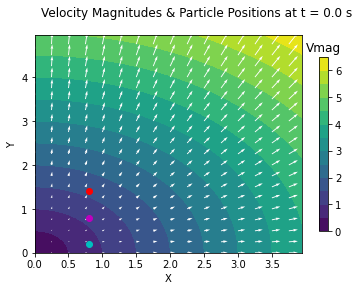

In [4]:
# Contour intervals for plotting velocity
cc = numpy.arange(0, 7, 0.5)
cl = numpy.arange(0, 7, 1)

# Plot velocity magnitudes and vectors and particle positions at time t=0.
initfig = plt.figure(1)
initfig.suptitle("Velocity Magnitudes & Particle Positions at t = %1.1f s" % tt[0])
c = plt.contourf(xx, yy, vmag[:, :, 0], cc)
cbar = initfig.colorbar(c, shrink=0.8, ticks=cl)
cbar.ax.set_title("Vmag")

plt.quiver(xx[::5], yy[::5], vx[::5,::5, 0], vy[::5,::5, 0], color='w', scale=30, scale_units='inches')
plt.plot(ptrackx[0, 0], ptracky[0, 0], 'ro', markerfacecolor='r')
plt.plot(ptrackx[1, 0], ptracky[1, 0], 'mo', markerfacecolor='m')
plt.plot(ptrackx[2, 0], ptracky[2, 0], 'co', markerfacecolor='c')
plt.xlabel("X")
plt.ylabel("Y")

Step 4: Integrate particle positions

In [5]:
# Integrate particle positions through the velocity field.
# Use simple forward integration, assuming the time steps are fine enough to do so.
# Use velocity at the nearest grid point, assuming spatial discretisation is fine enough to allow this approximation.
for it in range(nt - 1):
    for ip in range(np):
        p_xi = int(round(ptrackx[ip, it] / dx))
        p_yi = int(round(ptracky[ip, it] / dy))
        ptrackx[ip, it + 1] = ptrackx[ip, it] + vx[p_yi, p_xi, it] * dt
        ptracky[ip, it + 1] = ptracky[ip, it] + vy[p_yi, p_xi, it] * dt

Step 5: Plot velocities at last time and superimpose particle trajectories

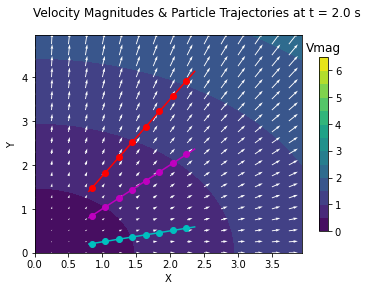

In [6]:

# Plot velocity magnitudes and vectors and particle positions at final time.
finalfig = plt.figure(2)
finalfig.suptitle("Velocity Magnitudes & Particle Trajectories at t = %1.1f s" % tt[-1])
c = plt.contourf(xx, yy, vmag[:, :, -1], cc)
cbar = finalfig.colorbar(c, shrink=0.8, ticks=cl)
cbar.ax.set_title("Vmag")
plt.quiver(xx[::5], yy[::5], vx[::5,::5, 0], vy[::5,::5, 0], color='w', scale=30, scale_units='inches')
plt.xlabel("X")
plt.ylabel("Y")

# Superimpose (onto figure 2) the particle positions at timesteps defined in everyt.
everyt = numpy.arange(1, nt, 5)
for it in everyt:
    plt.plot(ptrackx[0, it], ptracky[0, it], 'ro', markerfacecolor='r')
    plt.plot(ptrackx[1, it], ptracky[1, it], 'mo', markerfacecolor='m')
    plt.plot(ptrackx[2, it], ptracky[2, it], 'co', markerfacecolor='c')

# Connect positions with a line to show particle paths.
plt.plot(ptrackx[0, :], ptracky[0, :], 'r-')
plt.plot(ptrackx[1, :], ptracky[1, :], 'm-')
plt.plot(ptrackx[2, :], ptracky[2, :], 'c-')

plt.show()


Things you could try yourself:
* Change the grid spacing and/or time stepping and see if you still get the correct solution
* Change initial tracer positions to get a further idea of how tracers move in different parts of the velocity field
* Try a velocity field that does not lead to a zero acceleration.
* Modify the code to compute particle trajectories as a vector operation, rather than a loop over the particles. This would allow you to more efficiently compute the positions of larger numbers of particles